In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

raw_data = pd.read_csv("Covid Data.csv")
raw_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [2]:

def drop_nulls(df, cols):
    cols = list(cols)
    cols.remove("AGE")
    for c in cols:
        df = df[df[c] <= 15]
    return df

In [3]:
x = lambda a: 0 if a == 2 else 1

In [4]:
# Data cleaning
data = raw_data.copy()

# remove non covid patients
data = data[data["CLASSIFICATION_FINAL"] < 4]

# binary death conversion
data['DEATH_STATUS'] = data['DATE_DIED'].apply(lambda x: 0 if x == "9999-99-99" else 1)
data.drop('DATE_DIED', axis=1, inplace=True)

# Fill in missing pregnancy data for males
data.loc[data["SEX"] == 2, "PREGNANT"] = 2

# drop 97 and 99 values for non age columns
data = drop_nulls(data, data.columns)

# removing nulls removed all non-hospital patients
data.drop("PATIENT_TYPE", axis=1, inplace=True)

# data[["INTUBED", "PATIENT_TYPE", "SEX", "PNEUMONIA", "PREGNANT", "DIABETES", "COPD", "INMSUPR",
#       "HYPERTENSION", "OTHER_DISEASE", "RENAL_CHRONIC", "TOBACCO", "ICU"]].apply(x)
data["INTUBED"] = data["INTUBED"].apply(x)
# data["PATIENT_TYPE"] = data["PATIENT_TYPE"].apply(x)
data["SEX"] = data["SEX"].apply(x)
data["PNEUMONIA"] = data["PNEUMONIA"].apply(x)
data["PREGNANT"] = data["PREGNANT"].apply(x)
data["DIABETES"] = data["DIABETES"].apply(x)
data["COPD"] = data["COPD"].apply(x)
data["HYPERTENSION"] = data["HYPERTENSION"].apply(x)
data["OTHER_DISEASE"] = data["OTHER_DISEASE"].apply(x)
data["RENAL_CHRONIC"] = data["RENAL_CHRONIC"].apply(x)
data["TOBACCO"] = data["TOBACCO"].apply(x)
data["ICU"] = data["ICU"].apply(x)
data["CARDIOVASCULAR"] = data["CARDIOVASCULAR"].apply(x)
data["INMSUPR"] = data["INMSUPR"].apply(x)
data["OBESITY"] = data["OBESITY"].apply(x)
data

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU,DEATH_STATUS
2,2,1,0,1,0,55,0,1,0,2,0,0,0,0,0,0,0,3,0,1
5,2,1,1,0,1,40,0,0,0,2,0,0,0,0,0,0,0,3,0,0
8,2,1,1,0,0,37,0,1,0,2,0,1,0,0,1,0,0,3,0,0
9,2,1,1,0,0,25,0,0,0,2,0,0,0,0,0,0,0,3,0,0
11,2,1,0,0,0,24,0,0,0,2,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047913,1,13,0,0,0,54,0,1,0,2,0,0,0,0,0,0,0,3,0,0
1047919,1,13,0,0,0,62,0,0,0,2,0,0,0,0,0,0,0,3,0,0
1047928,1,13,1,0,0,47,0,1,0,2,0,0,0,0,0,0,0,3,0,0
1047929,1,13,0,0,0,72,0,1,0,2,0,0,0,1,1,0,0,3,0,0


In [5]:
# # Data Plots
# #figure, axes = plt.subplots(len(X.columns) // 5, 5)
# #figure.set_size_inches(20,30)

# #axes = axes.reshape(len(X.columns)) # This treats axes as a 1D array, so we can iterate over it

# #sb.stripplot(x="CLASSIFICATION_FINAL", y="AGE", data=data, jitter=True, legend=False, hue="CLASSIFICATION_FINAL", palette="Set2")
# # TODO: we should probably just graph age demographics, sex, obesity, and tobacco users as a percentage of intubated patients and dead patients

# young_children = data['AGE'] < 5
# children = np.logical_and(18 > data['AGE'], data['AGE'] > 5)
# young_adults = np.logical_and(35 > data['AGE'], data['AGE'] >= 18)
# adults = np.logical_and(65 > data['AGE'], data['AGE'] >= 35)
# elderly = data['AGE'] >= 65

# females = data["SEX"] == 1
# males = data["SEX"] == 2

# obese = data["OBESITY"] == 1
# non_obese = data["OBESITY"] == 2

# tobacco_users = data["TOBACCO"] == 1
# non_tobacco_users = data["TOBACCO"] == 2

# intubated = data["INTUBED"] == 1
# non_intubated = data["INTUBED"] == 2

# dead = data["DATE_DIED"].notna()
# alive = data["DATE_DIED"].isna()

# age_groups = {
#     "Young Children (0-4)": young_children,
#     "Children (4-17)": children,
#     "Young Adults (18-34)": young_adults,
#     "Adults (35-64)": adults,
#     "Elderly (65+)": elderly
# }

# sexes = {
#     "Male": males,
#     "Female": females
# }

# obesity = {
#     "Obese": obese,
#     "Non-Obese": non_obese
# }

# tobacco = {
#     "Tobacco Users": tobacco_users,
#     "Non-Tobacco Users": non_tobacco_users
# }

# intubation = {
#     "Intubated": intubated,
#     "Non-Intubated": non_intubated
# }

# death = {
#     "Dead": dead,
#     "Alive": alive
# }

# figure, axes = plt.subplots(2, 3, figsize=(20, 15))
# ax = axes.ravel()

# figure.suptitle("Overall Demographics of COVID-19 Patients")

# for i, d in enumerate([age_groups, sexes, obesity, tobacco, intubation, death]):
#     ax[i].pie(
#         [len(data[cond]) for cond in d.values()],
#         labels=d.keys(),
#         autopct='%1.1f%%',
#         colors=['xkcd:sky blue','r','g','m'])

In [6]:
# # Overall demographics of dead and intubated patients
# figure, axes = plt.subplots(1, 4, figsize=(20, 6))
# ax = axes.ravel()

# figure.suptitle("Demographics of COVID-19 Deaths")

# ax[0].bar(age_groups.keys(), [len(data[dead & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
# ax[0].set_ylabel('Deaths')
# ax[0].get_xaxis().set_ticks([])
# ax[0].legend(labels=age_groups.keys(), title='Age Group')
# ax[0].bar_label(ax[0].containers[0])

# for i, d in enumerate([sexes, obesity, tobacco]):
#     ax[1+i].pie(
#         [len(data[dead & cond]) for cond in d.values()],
#         labels=d.keys(),
#         autopct='%1.1f%%',
#         colors=['xkcd:sky blue','r','g','m'])

# figure, axes = plt.subplots(1, 4, figsize=(20, 6))
# ax = axes.ravel()

# figure.suptitle("Demographics of COVID-19 Intubations")

# ax[0].bar(age_groups.keys(), [len(data[intubated & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
# ax[0].set_ylabel('Deaths')
# ax[0].get_xaxis().set_ticks([])
# ax[0].legend(labels=age_groups.keys(), title='Age Group')
# ax[0].bar_label(ax[0].containers[0])

# for i, d in enumerate([sexes, obesity, tobacco]):
#     ax[1+i].pie(
#         [len(data[tobacco_users & cond]) for cond in d.values()],
#         labels=d.keys(),
#         autopct='%1.1f%%',
#         colors=['xkcd:sky blue','r','g','m'])

In [7]:
# data['DEATH_STATUS'] = data['DATE_DIED'].notna().astype(int)
# data.drop('DATE_DIED', axis=1, inplace=True)
# data.head(20)

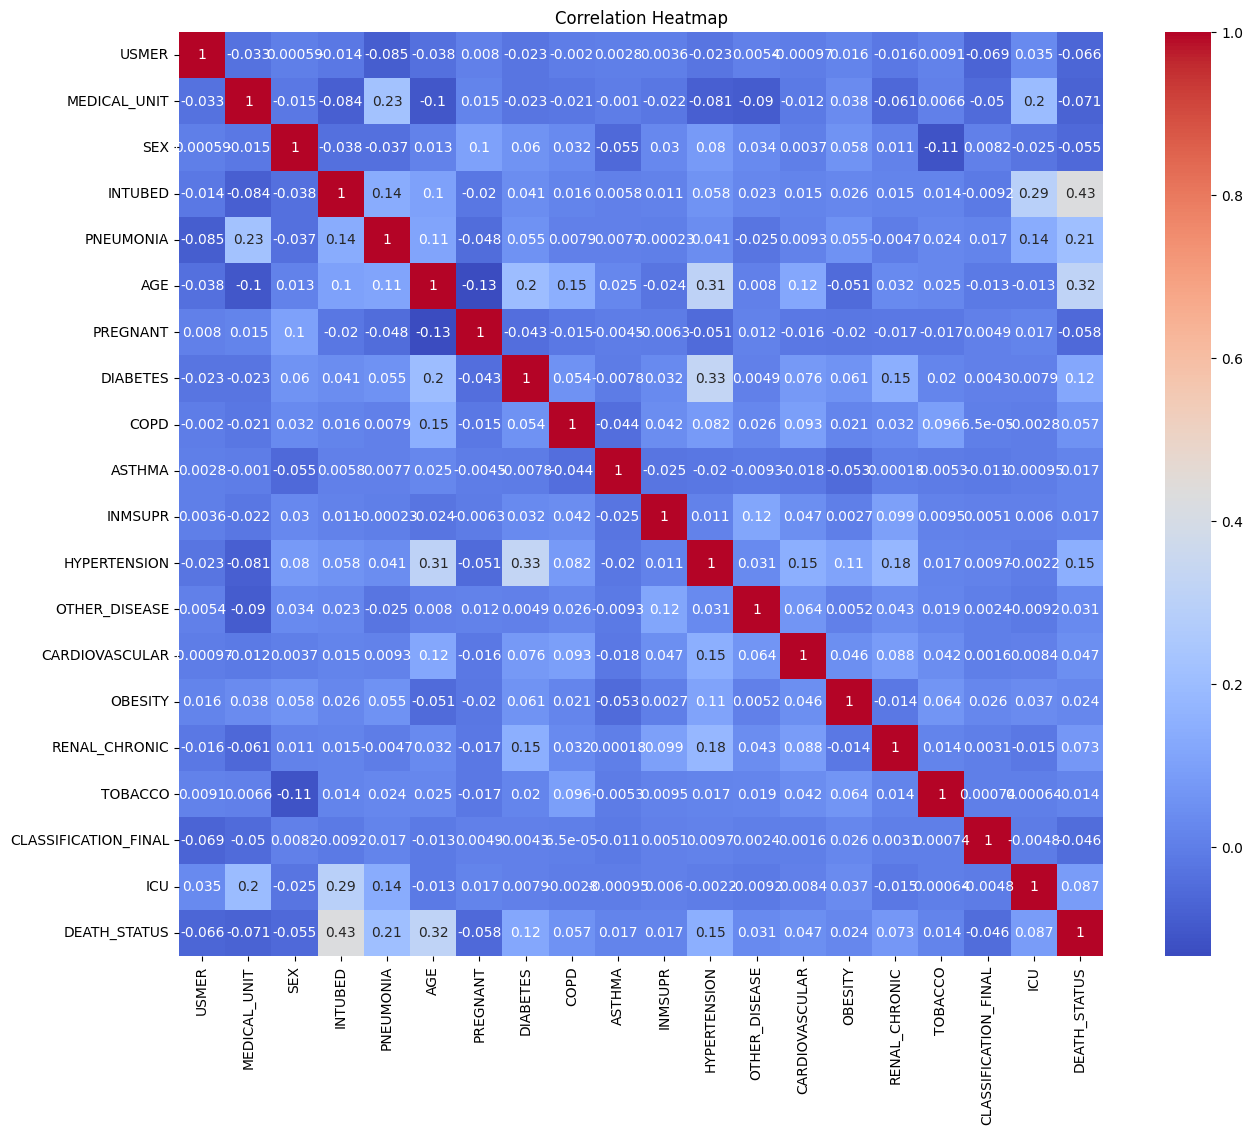

In [8]:
import seaborn as sns
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.show()

## ML

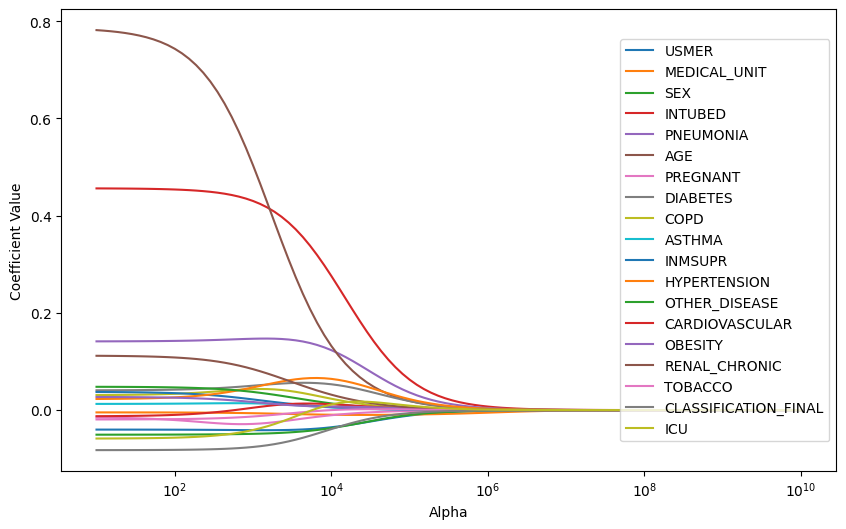

Text(0, 0.5, 'Mean Squared Error')

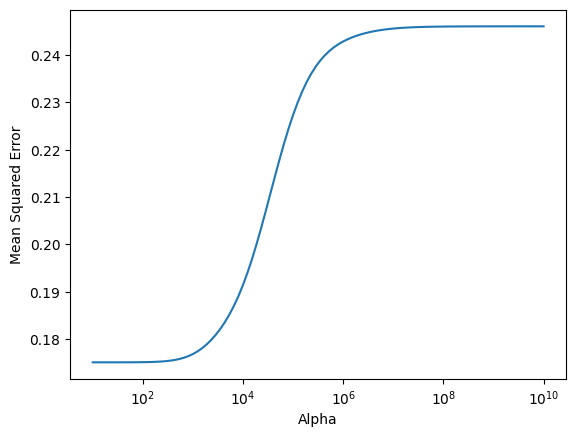

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])

y = data['DEATH_STATUS'].copy()
X = pd.get_dummies(data.drop('DEATH_STATUS', axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

alphas = np.logspace(1, 10, 100)
coefficients = []
mses = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    coefficients.append(ridge_model.coef_)
    mses.append(mean_squared_error(y_test, y_pred))

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xscale('log')  # using a logarithmic scale for better visibility
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend(X.columns, loc = 'right')
plt.show()

#mse = mean_squared_error(y_test, y_pred)
plt.plot(alphas, mses)
plt.xscale('log')  # using a logarithmic scale for better visibility
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')

In [10]:
# Create a LASSO regression object with alpha=0.1
ridge = Ridge(alpha=100)

# Fit the LASSO model to the training data
ridge.fit(X, y)

# Get the coefficients of the LASSO model
coefficients = ridge.coef_
print(coefficients)

# Select the features with non-zero coefficients
selected_features = [i for i, coef in enumerate(coefficients) if abs(coef) > 0.07]

# Use the selected features to train and test the classification model
X = X.iloc[:, selected_features]

[-0.04199828 -0.00488068 -0.04753024  0.45706034  0.13949442  0.75177086
 -0.01273609  0.04017785  0.02977803  0.02538181  0.03478306  0.02467526
  0.04324606 -0.00300495  0.02545881  0.10445424 -0.01768883 -0.07827322
 -0.05353764]


In [11]:
X

,INTUBED,PNEUMONIA,AGE,RENAL_CHRONIC,CLASSIFICATION_FINAL
2,1,0,0.523810,0,3
5,0,1,0.380952,0,3
8,0,0,0.352381,0,3
9,0,0,0.238095,0,3
11,0,0,0.228571,0,3
...,...,...,...,...,...
1047913,0,0,0.514286,0,3
1047919,0,0,0.590476,0,3
1047928,0,0,0.447619,0,3
1047929,0,0,0.685714,0,3


In [12]:
selected_features

[3, 4, 5, 15, 17]

In [13]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [14]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

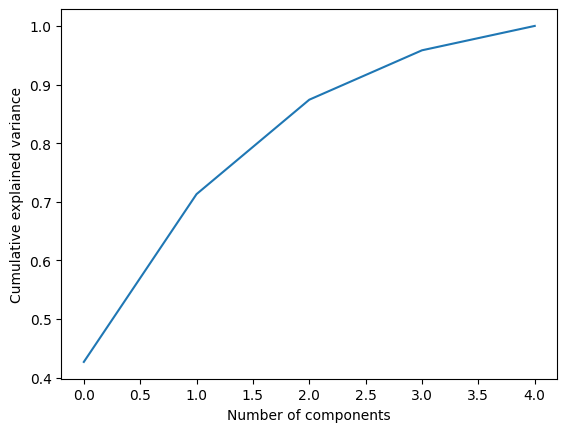

In [15]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [16]:
n_components = 4

pca = PCA(n_components = n_components)
pca.fit(X)
X_pca = pca.transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_pca_df

,PC1,PC2,PC3,PC4
0,0.308448,0.977929,-0.084918,-0.062191
1,-0.219294,-0.333698,-0.042430,-0.051561
2,0.703049,0.053023,-0.064397,-0.055737
3,0.708432,0.050508,-0.065473,-0.060738
4,0.708880,0.050298,-0.065563,-0.061155
...,...,...,...,...
108155,0.695424,0.056586,-0.062874,-0.048653
108156,0.691836,0.058262,-0.062157,-0.045319
108157,0.698564,0.055119,-0.063501,-0.051570
108158,0.687351,0.060358,-0.061260,-0.041151


### model building

#### logreg

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=0)

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
}

logreg = LogisticRegression(solver='liblinear')

grid_search_LogReg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search_LogReg.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_LogReg.best_params_)
print("Best Score:", grid_search_LogReg.best_score_)

logreg_predictions = grid_search_LogReg.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, logreg_predictions))
print("Classification Report:\n", classification_report(y_test, logreg_predictions))

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.7105445229073977
Model Accuracy:  0.7137111686390533
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.91      0.78     12188
           1       0.80      0.46      0.58      9444

    accuracy                           0.71     21632
   macro avg       0.74      0.68      0.68     21632
weighted avg       0.74      0.71      0.70     21632



#### knn

In [19]:
param_grid = {
    'n_neighbors': [3, 5, 15],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

knn_predictions = grid_search_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

Best Parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Best Score: 0.7270825893640493
Accuracy: 0.7262851331360947
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     12188
           1       0.71      0.63      0.67      9444

    accuracy                           0.73     21632
   macro avg       0.72      0.72      0.72     21632
weighted avg       0.73      0.73      0.72     21632



In [20]:
# knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
# knn.fit(X_train, y_train)

# knn_predictions = knn.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, knn_predictions))
# print("Classification Report:\n", classification_report(y_test, knn_predictions))

KNN: Best Parameters: {'n_neighbors': 15, 'weights': 'uniform'}

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rfc = RandomForestClassifier()

grid_search_forest = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

grid_search_forest.fit(X_train, y_train)

print("Best Parameters:", grid_search_forest.best_params_)
print("Best Score:", grid_search_forest.best_score_)

rf_predictions = grid_search_forest.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.7419216614326557
Model Accuracy:  0.7404770710059172
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.78     12188
           1       0.75      0.62      0.67      9444

    accuracy                           0.74     21632
   macro avg       0.74      0.73      0.73     21632
weighted avg       0.74      0.74      0.74     21632



#### example patient predictor

In [22]:
age = 34
intubated = 0
pneumonia = 1
renal_chronic = 1
classification = 1

scaled_age = scaler.transform([[age]])[0][0]

input_features = [intubated, pneumonia, scaled_age, renal_chronic, classification]

input_features_pca = pca.transform([input_features])

prediction = grid_search_forest.predict(input_features_pca)[0]

print(f'Prediction: {prediction}')

probabilities = grid_search_forest.predict_proba(input_features_pca)
print(f'Probability of death: {probabilities[0][1]}')

Prediction: 0
Probability of death: 0.2620609365586569


/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.preprocessing import LabelEncoder
import keras
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
encoder.fit(y_test)
y_test = encoder.transform(y_test)
model = keras.models.Sequential([
    keras.layers.Dense(100, input_shape = (len(X_train.columns),)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

2024-04-18 16:38:39.359215: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 16:38:39.384868: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 16:38:39.553578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 16:38:39.553855: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 16:38:39.581178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Train using mini batch
history_mb = model.fit(
    X_train,
    y_train,
    batch_size=128,
    steps_per_epoch=len(X_train) // 128,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/10
676/676 [==============================] - 4s 5ms/step - loss: 0.6333 - accuracy: 0.6936 - val_loss: 0.5894 - val_accuracy: 0.7148
Epoch 2/10
676/676 [==============================] - 3s 5ms/step - loss: 0.5765 - accuracy: 0.7102 - val_loss: 0.5675 - val_accuracy: 0.7153
Epoch 3/10
676/676 [==============================] - 3s 5ms/step - loss: 0.5699 - accuracy: 0.7142 - val_loss: 0.5664 - val_accuracy: 0.7185
Epoch 4/10
676/676 [==============================] - 3s 5ms/step - loss: 0.5692 - accuracy: 0.7156 - val_loss: 0.5661 - val_accuracy: 0.7186
Epoch 5/10
676/676 [==============================] - 3s 5ms/step - loss: 0.5689 - accuracy: 0.7157 - val_loss: 0.5659 - val_accuracy: 0.7186
Epoch 6/10
676/676 [==============================] - 3s 5ms/step - loss: 0.5686 - accuracy: 0.7158 - val_loss: 0.5657 - val_accuracy: 0.7187
Epoch 7/10
676/676 [==============================] - 3s 5ms/step - loss: 0.5684 - accuracy: 0.7159 - val_loss: 0.5655 - val_accuracy: 0.7188
Epoch 

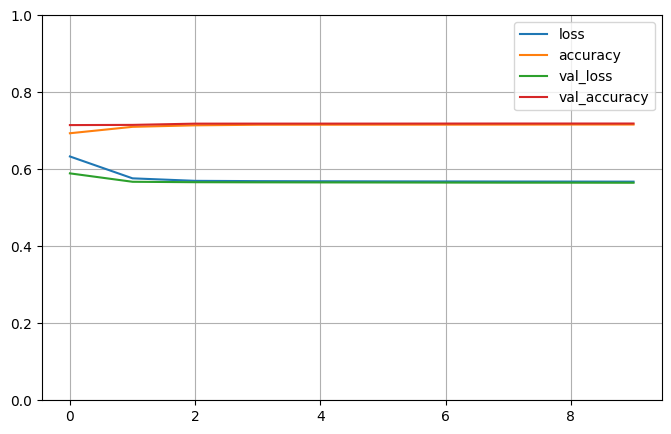

In [26]:
pd.DataFrame(history_mb.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [27]:
model.evaluate(X_test.astype('float32'), y_test.astype('float32'))

676/676 [==============================] - 2s 3ms/step - loss: 0.5650 - accuracy: 0.7188


[0.5649991631507874, 0.7188424468040466]

In [28]:
# train using stochastic gradient decent
history_sgd = model.fit(
    X_train,
    y_train,
    steps_per_epoch=len(X_train) // 128,
    epochs=30,
    validation_data=(X_test.astype('float32'), y_test.astype('float32'))
)

Epoch 1/30
676/676 [==============================] - 4s 6ms/step - loss: 0.5676 - accuracy: 0.7162 - val_loss: 0.5648 - val_accuracy: 0.7188
Epoch 2/30
676/676 [==============================] - 4s 6ms/step - loss: 0.5674 - accuracy: 0.7162 - val_loss: 0.5646 - val_accuracy: 0.7188
Epoch 3/30
676/676 [==============================] - 4s 7ms/step - loss: 0.5673 - accuracy: 0.7162 - val_loss: 0.5644 - val_accuracy: 0.7188
Epoch 4/30
676/676 [==============================] - 4s 6ms/step - loss: 0.5671 - accuracy: 0.7162 - val_loss: 0.5642 - val_accuracy: 0.7188
Epoch 5/30
676/676 [==============================] - 4s 6ms/step - loss: 0.5669 - accuracy: 0.7162 - val_loss: 0.5640 - val_accuracy: 0.7188
Epoch 6/30
676/676 [==============================] - 5s 7ms/step - loss: 0.5667 - accuracy: 0.7162 - val_loss: 0.5638 - val_accuracy: 0.7188
Epoch 7/30
676/676 [==============================] - 4s 6ms/step - loss: 0.5665 - accuracy: 0.7162 - val_loss: 0.5636 - val_accuracy: 0.7188
Epoch 

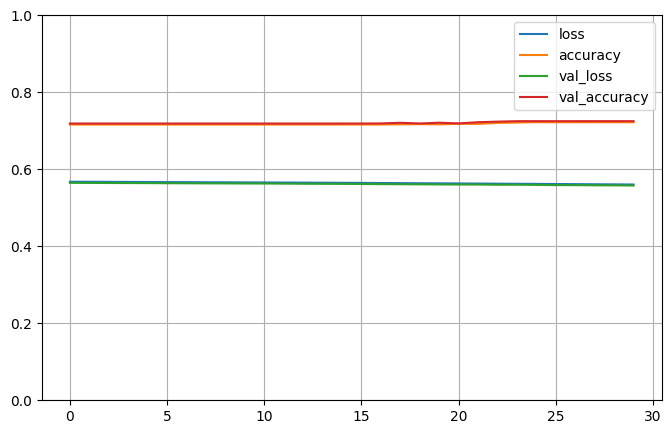

In [29]:
# Print out our SDG loss and accuracy info per epoch
pd.DataFrame(history_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [30]:
model.evaluate(X_test.astype('float32'), y_test.astype('float32'))

676/676 [==============================] - 2s 3ms/step - loss: 0.5578 - accuracy: 0.7250


[0.5577736496925354, 0.724990725517273]